In [1]:
import os
os.chdir('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/')

In [2]:
import pandas as pd
import gzip, shutil

# 1) Make barcodes.tsv.gz
meta = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/cell_metadata.csv", dtype=str)
# if your barcode column is named “bc_wells”:
barcodes = meta["bc_wells"]
# otherwise use meta.iloc[:,0]
barcodes.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 2) Make features.tsv.gz
feat = pd.read_csv(
    "/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/all_genes.csv",
    header=None,
    names=["ensembl","symbol","assembly"],
    dtype=str
)
feat.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/features.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/features.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 3) Gzip your matrix file
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
    shutil.copyfileobj(src, dst)


In [3]:
import scipy.io as sio
import pandas as pd
import anndata

# --- 1) Read the sparse count‐matrix (.mtx) ---
mtx = sio.mmread("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/count_matrix.mtx").tocsr()
n_cells, n_genes = mtx.shape
print(f"Matrix has {n_cells} cells × {n_genes} genes")

# --- 2) Read your barcodes (.tsv) ---
# assumes one barcode per line, no header
bc = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
barcodes = bc["barcode"].tolist()

# --- 3) Read your feature list (.tsv) ---
# assumes a header line with columns e.g. gene_id, gene_name, genome
feat = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# if your file has more rows than your matrix has genes, trim:
if feat.shape[0] > n_genes:
    feat = feat.iloc[:n_genes].copy()
assert feat.shape[0] == n_genes, \
       f"{feat.shape[0]} features != {n_genes} genes"

# pick whichever column you want as var_names; here we use gene_name
# keep all other columns as metadata
var = feat.set_index("gene_name")
var.index.name = "gene_symbol"

# --- 4) Build AnnData ---
adata_1 = anndata.AnnData(
    X=mtx,
    obs=pd.DataFrame(index=barcodes),
    var=var
)
adata_1.obs_names.name = "barcode"

print(adata_1)  # should show n_obs=… × n_vars=…

# --- 5) Write out a single .h5ad file ---
adata_1.write_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/adata_1.h5ad")
print("→ Saved to adata.h5ad")


Matrix has 55288 cells × 30454 genes
AnnData object with n_obs × n_vars = 55288 × 30454
    var: 'gene_id', 'genome'


/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


→ Saved to adata.h5ad


In [4]:
import pandas as pd
import gzip, shutil

# 1) Make barcodes.tsv.gz
meta = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/cell_metadata.csv", dtype=str)
# if your barcode column is named “bc_wells”:
barcodes = meta["bc_wells"]
# otherwise use meta.iloc[:,0]
barcodes.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 2) Make features.tsv.gz
feat = pd.read_csv(
    "/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/all_genes.csv",
    header=None,
    names=["ensembl","symbol","assembly"],
    dtype=str
)
feat.to_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/features.tsv","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/features.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 3) Gzip your matrix file
with open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
    shutil.copyfileobj(src, dst)


In [5]:
import scipy.io as sio
import pandas as pd
import anndata

# --- 1) Read the sparse count‐matrix (.mtx) ---
mtx = sio.mmread("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/count_matrix.mtx").tocsr()
n_cells, n_genes = mtx.shape
print(f"Matrix has {n_cells} cells × {n_genes} genes")

# --- 2) Read your barcodes (.tsv) ---
# assumes one barcode per line, no header
bc = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
barcodes = bc["barcode"].tolist()

# --- 3) Read your feature list (.tsv) ---
# assumes a header line with columns e.g. gene_id, gene_name, genome
feat = pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# if your file has more rows than your matrix has genes, trim:
if feat.shape[0] > n_genes:
    feat = feat.iloc[:n_genes].copy()
assert feat.shape[0] == n_genes, \
       f"{feat.shape[0]} features != {n_genes} genes"

# pick whichever column you want as var_names; here we use gene_name
# keep all other columns as metadata
var = feat.set_index("gene_name")
var.index.name = "gene_symbol"

# --- 4) Build AnnData ---
adata_2 = anndata.AnnData(
    X=mtx,
    obs=pd.DataFrame(index=barcodes),
    var=var
)
adata_2.obs_names.name = "barcode"

print(adata_2)  # should show n_obs=… × n_vars=…

# --- 5) Write out a single .h5ad file ---
adata_2.write_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/adata_2.h5ad")
print("→ Saved to adata.h5ad")

Matrix has 55129 cells × 30454 genes
AnnData object with n_obs × n_vars = 55129 × 30454
    var: 'gene_id', 'genome'


/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


→ Saved to adata.h5ad


In [6]:
import scanpy as sc
adata_1 = sc.read_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh3__957/DGE_unfiltered/adata_1.h5ad")
adata_2 = sc.read_h5ad("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/etoh4__958/DGE_unfiltered/adata_2.h5ad")

/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
# Mutate each AnnData so that its var_names are unique
a1 = adata_1.copy()
a2 = adata_2.copy()

a1.var_names_make_unique()  
a2.var_names_make_unique()

# Now you can concat without errors
adata = anndata.concat(
    [a1, a2],
    join="outer",
    label="batch",
    keys=["batch1","batch2"],
)
print(adata)


/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/dipal/miniconda3/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 110417 × 30454
    obs: 'batch'


In [8]:
print(adata)                   # Shows dimensions, annotations
print(adata.obs.head())        # Cell-level metadata
print(adata.var.head())        # Gene-level metadata

AnnData object with n_obs × n_vars = 110417 × 30454
    obs: 'batch'
               batch
barcode             
07_01_01__s1  batch1
07_01_02__s1  batch1
07_01_03__s1  batch1
07_01_04__s1  batch1
07_01_05__s1  batch1
Empty DataFrame
Columns: []
Index: [Arsj, Gad1, Alx4, Tmco5b, Cbln1]


/home/dipal/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


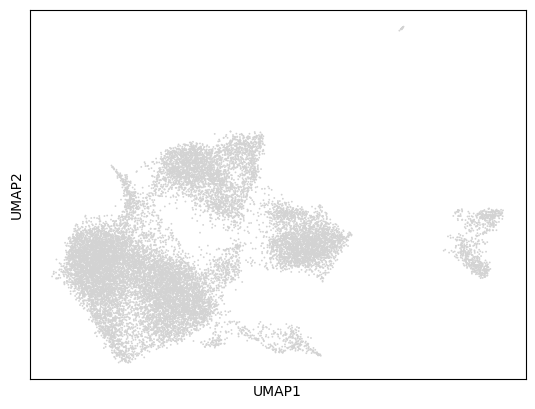

/tmp/ipykernel_9635/1551323038.py:28: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


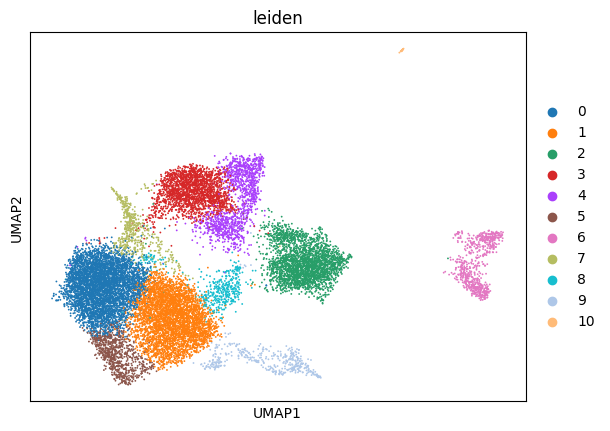

In [8]:
# 2) Compute QC metrics (mito%, total counts, n_genes)
# adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
# sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# # 3) (Optional) Inspect distributions to pick thresholds
# sc.pl.violin(adata, ["total_counts", "n_genes_by_counts", "pct_counts_mt"],
#              jitter=0.4, multi_panel=True)

sc.pp.filter_cells(adata, min_genes=200)
# adata = adata[adata.obs.pct_counts_mt < 5, :]
# adata = adata[adata.obs.total_counts < 25000, :]
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
# 6) (Optional) Identify highly variable genes for downstream
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor="seurat")

# 7) (Optional) Scale and regress out unwanted effects
# sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata, max_value=10)


sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata)
sc.tl.leiden(adata)
sc.pl.umap(adata, color=['leiden'])

In [10]:
# Read the excel file
df_markers = pd.read_excel('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx')
print(df_markers.dtypes)

tissueType         object
cellName           object
geneSymbolmore1    object
geneSymbolmore2    object
shortName          object
dtype: object


In [12]:
for col in ["tissueType","cellName","shortName"]:
    df_markers[col] = df_markers[col].apply(lambda x: "" if pd.isna(x) else str(x))

In [13]:
def quote_genes(cell: str) -> str:
    """Split a CSV string, strip whitespace, and wrap each gene in quotes."""
    if pd.isna(cell) or not cell.strip():
        return ""
    genes = [g.strip() for g in cell.split(",") if g.strip()]
    return ",".join(f'"{g}"' for g in genes)

for col in ["geneSymbolmore1", "geneSymbolmore2"]:
    df_markers[f"{col}_quoted"] = df_markers[col].apply(quote_genes)

# Example: look at the first few
print(df_markers[["geneSymbolmore1", "geneSymbolmore1_quoted"]].head())

                                     geneSymbolmore1  \
0  CD27,IgD,CD24,PTPRC,PAX5,CD24,CD38,CD79A,DNTT,...   
1  CD19,CD27,IgD,CD24,PTPRC,PAX5,CD24,CD38,CD79A,...   
2  CD19,IgD,CD38,CD24,CD20,MS4A1,PTPRC,PAX5,CD24,...   
3  CD19,CD27,IgD,CD38,CD24,CD20,MS4A1,PTPRC,PAX5,...   
4  CD27,IgD,CD38,CD24,CD20,MS4A1,PTPRC,PAX5,CD24,...   

                              geneSymbolmore1_quoted  
0  "CD27","IgD","CD24","PTPRC","PAX5","CD24","CD3...  
1  "CD19","CD27","IgD","CD24","PTPRC","PAX5","CD2...  
2  "CD19","IgD","CD38","CD24","CD20","MS4A1","PTP...  
3  "CD19","CD27","IgD","CD38","CD24","CD20","MS4A...  
4  "CD27","IgD","CD38","CD24","CD20","MS4A1","PTP...  


In [19]:
# Filter for rows related to immune system
immune_df = df_markers[df_markers["tissueType"] == "Immune system"]

# # Create marker dictionary
# immune_markers = {}
# for _, row in immune_df.iterrows():
#     cell_type = row["cellName"]
#     genes_raw = str(row["geneSymbolmore1"])
#     if pd.notna(genes_raw):
#         gene_list = [gene.strip() for gene in genes_raw.split(",") if gene.strip()]
#         immune_markers[cell_type] = gene_list

# # Show a preview of the marker dictionary (first 5 entries)
# dict(list(immune_markers.items())[:5])

#Columns containing comma‑separated gene lists
gene_cols = ["geneSymbolmore1_quoted"]#, "geneSymbolmore2"]

# Build the marker dictionary
immune_markers = {}
for _, row in immune_df.iterrows():
    cell_type = row["shortName"]
    genes = []
    for col in gene_cols:
        raw = row.get(col)
        if pd.notna(raw):
            # split, strip, and extend
            genes.extend(g.strip() for g in str(raw).split(",") if g.strip())
    # optional: dedupe while preserving order
    seen = set()
    deduped = []
    for g in genes:
        if g not in seen:
            seen.add(g)
            deduped.append(g)
    immune_markers[cell_type] = deduped

# Preview the first 5 entries
import itertools
print(dict(itertools.islice(immune_markers.items(), 5)))

# gene_cols = ["geneSymbolmore1_quoted"]#, "geneSymbolmore2"]
# immune_markers = {}
# for _, row in immune_df.iterrows():
#     ct = row["shortName"]
#     genes = []
#     for col in gene_cols:
#         raw = row.get(col)
#         if pd.notna(raw):
#             # split on commas, strip, UPPERCASE each gene
#             for g in str(raw).split(","):
#                 g2 = g.strip().upper()
#                 if g2:
#                     genes.append(g2)
#     # dedupe while preserving order
#     seen = set()
#     uniq = []
#     for g in genes:
#         if g not in seen:
#             seen.add(g)
#             uniq.append(g)
#     immune_markers[ct] = uniq

# # 2) Flatten into one big set of UPPERCASED markers
# all_markers = {
#     g for sublist in immune_markers.values() for g in sublist
# }

# # 3) Compute the intersection
# adata_genes = set(adata.var_names)
# matched = sorted(all_markers & adata_genes)

# print(f"Matched {len(matched)} / {len(all_markers)} markers:")
# print(matched)


{'Pro-B': ['"CD27"', '"IgD"', '"CD24"', '"PTPRC"', '"PAX5"', '"CD38"', '"CD79A"', '"DNTT"', '"C10orf10"', '"VPREB1"', '"ARPP21"', '"CD99"', '"IGLL1"', '"CD9"', '"CD79B"', '"TCL1A"', '"IGLL5"', '"HLA-DQA1"', '"HLA-DQB1"', '"VPREB3"'], 'Pre-B': ['"CD19"', '"CD27"', '"IgD"', '"CD24"', '"PTPRC"', '"PAX5"', '"CD38"', '"CD79A"', '"NSMCE1"', '"PCDH9"', '"ACSM3"', '"CCDC191"', '"TCL1A"', '"CD79B"', '"IGLL5"', '"HLA-DQA1"', '"HLA-DQB1"', '"VPREB3"'], 'Naive B': ['"CD19"', '"IgD"', '"CD38"', '"CD24"', '"CD20"', '"MS4A1"', '"PTPRC"', '"PAX5"', '"CD79A"', '"JCHAIN"', '"SSR4"', '"FKBP11"', '"SEC11C"', '"DERL3"', '"PRDX4"', '"IGLL5"', '"CD79B"', '"TCL1A"', '"HLA-DQA1"', '"HLA-DQB1"', '"CD138"', '"VPREB3"'], 'Memory B': ['"CD19"', '"CD27"', '"IgD"', '"CD38"', '"CD24"', '"CD20"', '"MS4A1"', '"PTPRC"', '"PAX5"', '"CD79A"', '"JCHAIN"', '"SSR4"', '"FKBP11"', '"SEC11C"', '"DERL3"', '"PRDX4"', '"IGLL5"', '"CD79B"', '"TCL1A"', '"HLA-DQA1"', '"HLA-DQB1"', '"CD138"', '"VPREB3"'], 'Plasma B': ['"CD27"', '"IgD"

In [20]:
adata.var_names = adata.var_names.str.upper()
print(adata.var_names[20])

PALD1


In [21]:
# Flatten all marker genes into a list
all_marker_genes = set(gene for genes in immune_markers.values() for gene in genes)

# Check how many marker genes exist in adata
matched_genes = all_marker_genes.intersection(set(adata.var_names))
print(f"Matched {len(matched_genes)} out of {len(all_marker_genes)} marker genes.")
print(matched_genes)

Matched 0 out of 296 marker genes.
set()


In [9]:
import warnings
import numpy as np
import pandas as pd

def sctype_score(
    scRNAseqData: pd.DataFrame,
    scaled: bool = True,
    gs: dict[str, list[str]] = None,
    gs2: dict[str, list[str]] = None,
    gene_names_to_uppercase: bool = True,
) -> pd.DataFrame:
    """
    Score each cell for each signature in `gs` (positive markers) minus `gs2` (negative markers),
    weighting each gene by its 'marker sensitivity' (frequency across GS lists).
    """
    # 0) Basic sanity checks
    if not isinstance(scRNAseqData, pd.DataFrame):
        warnings.warn("scRNAseqData should be a pandas DataFrame")
    elif scRNAseqData.size == 0:
        warnings.warn("scRNAseqData has zero entries")

    if gs is None:
        raise ValueError("`gs` (positive gene sets) must be provided")
    if gs2 is None:
        gs2 = {ct: [] for ct in gs}

    # 1) Compute marker sensitivity from the union of all positive gene sets
    all_pos = [g for sub in gs.values() for g in sub]
    freq = pd.Series(all_pos).value_counts()  # gene -> count
    nsets = len(gs)
    # rescale counts so that count=1→0 and count=nsets→1
    sensitivity = (freq - 1) / (nsets - 1)
    marker_sens_df = pd.DataFrame({
        "gene_": freq.index,
        "score_marker_sensitivity": sensitivity.values
    })

    # 2) Optionally uppercase your gene names
    mat = scRNAseqData.copy()
    if gene_names_to_uppercase:
        mat.index = mat.index.str.upper()

    # 3) Filter each gs/gs2 list to genes actually in your data
    gs_filt  = {ct: [g for g in genes if g in mat.index] for ct, genes in gs.items()}
    gs2_filt = {ct: [g for g in genes if g in mat.index] for ct, genes in gs2.items()}

    # 4) Keep only sensitivities for the genes in your positive sets
    valid_genes = set(g for genes in gs_filt.values() for g in genes)
    marker_sens_df = marker_sens_df[marker_sens_df["gene_"].isin(valid_genes)]

    # 5) Build Z: either the raw data or row‐wise z‐scored
    if not scaled:
        # z‐score each row (gene)
        mu  = mat.mean(axis=1)
        sd  = mat.std(axis=1).replace(0, np.nan)
        Z = mat.sub(mu, axis=0).div(sd, axis=0).fillna(0)
    else:
        Z = mat

    # 6) Multiply each gene’s row by its sensitivity weight
    sens_map = marker_sens_df.set_index("gene_")["score_marker_sensitivity"]
    for gene, weight in sens_map.items():
        Z.loc[gene] = Z.loc[gene] * weight

    # 7) Subselect only the genes that appear in any positive or negative set
    all_markers = set(g for genes in gs_filt.values() for g in genes) | \
                  set(g for genes in gs2_filt.values() for g in genes)
    Z = Z.loc[list(all_markers)]

    # 8) Compute the signature score for each cell‐type × cell:
    #    sum(pos_genes)/sqrt(len(pos_genes))  –  sum(neg_genes)/sqrt(len(neg_genes))
    cells = Z.columns
    scores = {}
    for ct in gs_filt:
        pos = gs_filt[ct]
        neg = gs2_filt.get(ct, [])
        # sum up, normalize
        pos_sum = Z.loc[pos].sum(axis=0) / np.sqrt(len(pos)) if pos else pd.Series(0, index=cells)
        neg_sum = Z.loc[neg].sum(axis=0) / np.sqrt(len(neg)) if neg else pd.Series(0, index=cells)
        scores[ct] = pos_sum - neg_sum  # note minus for negative markers

    # 9) Build the result DataFrame (cell‐types × cells) and drop any all‐zero rows
    es = pd.DataFrame(scores).T  # index=cell‐type, columns=cells
    es = es.loc[~(es == 0).all(axis=1)]

    return es


In [10]:
import pandas as pd
import warnings
from mygene import MyGeneInfo

mg = MyGeneInfo()

def gene_sets_prepare(path_to_db_file: str, cell_type: str, species: str = "human"):
    """
    Read an Excel of marker genes, filter by tissueType == cell_type,
    clean and correct gene symbols (up and down lists), and return two dicts:
      - gs_positive: {cellName: [corrected up‐genes]}
      - gs_negative: {cellName: [corrected down‐genes]}
    """
    # 1) load & filter
    df = pd.read_excel(path_to_db_file)
    df = df[df["tissueType"] == cell_type].copy()
    # drop any fully‐empty rows
    df = df.dropna(subset=["geneSymbolmore1", "geneSymbolmore2"], how="all")

    # 2) strip spaces and ensure strings
    for col in ["geneSymbolmore1", "geneSymbolmore2"]:
        df[col] = df[col].fillna("").astype(str).str.replace(" ", "", regex=False)

    # helper to clean & correct one column
    def _clean_and_correct(series: pd.Series) -> pd.Series:
        out = []
        for raw in series:
            # split, uppercase, remove NA/empty, sort
            genes = [g.strip().upper() for g in raw.split(",") if g and g.upper() != "NA"]
            genes = sorted(set(genes))
            if not genes:
                out.append("")
                continue

            # query mygene for approved symbol
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                res = mg.querymany(
                    genes,
                    scopes="symbol",
                    fields="symbol",
                    species=species,
                    as_dataframe=True,
                    returnall=False
                )

            # pull out the “symbol” column, drop any NaNs
            if isinstance(res, pd.DataFrame) and "symbol" in res.columns:
                corrected = res["symbol"].dropna().unique().tolist()
            else:
                # fallback: keep original if no correction found
                corrected = [r.get("symbol", r["query"]) for r in res if "symbol" in r]

            out.append(",".join(corrected))
        return pd.Series(out, index=series.index)

    # 3) clean & correct each marker column
    df["geneSymbolmore1"] = _clean_and_correct(df["geneSymbolmore1"])
    df["geneSymbolmore2"] = _clean_and_correct(df["geneSymbolmore2"])

    # 4) final clean‐up (replace any “///” with commas, strip spaces again)
    for col in ["geneSymbolmore1", "geneSymbolmore2"]:
        df[col] = (
            df[col]
            .str.replace("///", ",", regex=False)
            .str.replace(" ", "", regex=False)
        )

    # 5) build your gs_positive / gs_negative dicts
    gs_pos = {}
    gs_neg = {}
    for _, row in df.iterrows():
        cn = row["cellName"]
        up_genes = [g for g in row["geneSymbolmore1"].split(",") if g]
        dn_genes = [g for g in row["geneSymbolmore2"].split(",") if g]
        gs_pos[cn] = up_genes
        gs_neg[cn] = dn_genes

    return {"gs_positive": gs_pos, "gs_negative": gs_neg}

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def auto_detect_tissue_type(path_to_db_file: str,
                            adata,
                            scaled: bool,
                            assay: str = "RNA"):
    """
    Loop over all tissue types in an Excel DB, score adata against each
    signature, then rank tissues by the mean top‐gene score per Leiden cluster.
    """
    # 1) Read the database and get unique tissues
    db = pd.read_excel(path_to_db_file)
    tissues = db['tissueType'].unique()
    results = []

    # 2) Loop over each tissue
    for tissue in tissues:
        print(f"Checking… {tissue}")

        # 2a) pull out positive/negative marker sets for this tissue
        gs = gene_sets_prepare(path_to_db_file, tissue)

        # 2b) grab the raw or scaled count matrix
        if scaled:
            # assume you stored scaled data in layers['scale.data']
            expr = adata.layers.get('scale.data')
            if expr is None:
                raise ValueError("scaled=True but no 'scale.data' layer in adata")
        else:
            expr = adata.X

        # wrap into a DataFrame genes × cells
        expr_df = pd.DataFrame(
            expr.T,
            index=adata.obs_names,
            columns=adata.var_names
        ).T

        # 2c) run the cell‐type scoring
        es_max = sctype_score(
            scRNAseqData=expr_df,
            scaled=scaled,
            gs=gs['gs_positive'],
            gs2=gs['gs_negative'],
            marker_sensitivity=gs['marker_sensitivity'],
            verbose=True
        )

        # 2d) for each Leiden cluster, sum the per‐gene scores across its cells,
        #     take the top gene, and record its score
        cluster_scores = []
        clusters = adata.obs['leiden'].unique()
        for cl in clusters:
            cells_in_cl = adata.obs_names[adata.obs['leiden'] == cl]
            # sum scores across those columns (cells)
            gene_sums = es_max.loc[:, cells_in_cl].sum(axis=1)
            top_gene_score = gene_sums.max()
            cluster_scores.append(top_gene_score)

        # 2e) the tissue’s summary score is the mean of those top‐gene scores
        results.append({
            'tissue': tissue,
            'score': np.mean(cluster_scores)
        })

    # 3) assemble & sort the results
    results_df = pd.DataFrame(results).sort_values('score', ascending=False)

    # 4) plot a simple barplot
    plt.figure(figsize=(8,4))
    plt.bar(results_df['tissue'], results_df['score'],
            color=(0.8, 0.1, 0.1, 0.6))
    plt.xticks(rotation=90, ha='right')
    plt.xlabel("Tissue")
    plt.ylabel("Summary score")
    plt.title("Higher score ⇒ more likely tissue type")
    plt.tight_layout()
    plt.show()

    return results_df


In [12]:
import scanpy as sc
import pandas as pd
import numpy as np
from anndata import AnnData

def run_sctype(
    adata: AnnData,
    known_tissue_type: str | None = None,
    assay: str = "RNA",
    scaled: bool = True,
    custom_marker_file: str | None = None,
    plot: bool = False,
    name: str = "sctype_classification",
) -> AnnData:
    """
    Annotate an AnnData with scType‐derived cell‐type per cluster.
    Adds a new adata.obs[name] column and (optionally) plots UMAP.
    """
    # 1) Basic checks
    if adata is None:
        raise ValueError("Argument 'adata' is missing")
    if not isinstance(adata, AnnData):
        raise ValueError("Argument 'adata' must be an AnnData object")

    # 2) Marker DB
    if custom_marker_file is None:
        try:
            custom_marker_file = sctype_source()
        except NameError:
            raise ValueError("No custom_marker_file and sctype_source() not defined")

    # 3) Guess tissue type if needed
    if known_tissue_type is None:
        print("Guessing tissue type…")
        df_tissue = auto_detect_tissue_type(custom_marker_file, adata, scaled, assay)
        known_tissue_type = df_tissue["tissue"].iloc[0]
    tissue_type = known_tissue_type

    # 4) Prepare positive/negative gene sets
    gs_list = gene_sets_prepare(custom_marker_file, tissue_type)
    gs_pos = gs_list["gs_positive"]
    gs_neg = gs_list["gs_negative"]

    # 5) Extract expression matrix (cells × genes)
    if scaled and "scale.data" in adata.layers:
        mat = adata.layers["scale.data"]
    else:
        mat = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X

    # Build a DataFrame cells × genes, then transpose to genes × cells
    df = pd.DataFrame(
        mat,
        index=adata.obs_names,
        columns=adata.var_names
    )
    expr_df = df.T
    # 6) Compute signature scores (signature × cell)
    es_max = sctype_score(
        scRNAseqData=expr_df,
        scaled=scaled,
        gs=gs_pos,
        gs2=gs_neg
    )

    # 7) Identify which cluster column to use
    if "seurat_clusters" in adata.obs:
        cluster_col = "seurat_clusters"
    elif "leiden" in adata.obs:
        cluster_col = "leiden"
    else:
        sc.pp.neighbors(adata)
        sc.tl.leiden(adata, key_added="leiden")
        cluster_col = "leiden"

    # 8) Summarize per‐cluster top scores
    rows = []
    for cl in adata.obs[cluster_col].unique():
        cells = adata.obs_names[adata.obs[cluster_col] == cl]
        gene_sums = es_max[cells].sum(axis=1)
        top10 = gene_sums.nlargest(10)
        for gene, score in top10.items():
            rows.append({
                "cluster": cl,
                "type": gene,
                "scores": float(score),
                "ncells": len(cells),
            })
    cL_df = pd.DataFrame(rows)
    # pick the single top per cluster
    idx = cL_df.groupby("cluster")["scores"].idxmax()
    sctype_scores = cL_df.loc[idx].copy()

    # 9) Low‐confidence clusters → "Unknown"
    low_conf = sctype_scores["scores"] < (sctype_scores["ncells"] / 4)
    sctype_scores.loc[low_conf, "type"] = "Unknown"

    # 10) Write the classification into adata.obs
    adata.obs[name] = ""
    for _, row in sctype_scores.iterrows():
        mask = adata.obs[cluster_col] == row["cluster"]
        adata.obs.loc[mask, name] = row["type"]

    # 11) Optional UMAP plot
    if plot:
        sc.pl.umap(adata, color=name)

    print(f"New metadata added: {name}")
    return adata


In [13]:
import os

def sctype_source() -> str:
    """
    Return the path to the ScType database file.
    Assumes 'ScTypeDB_full.xlsx' lives in the same directory as this notebook/script.
    """
    db_fname = "/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx"
    if not os.path.exists(db_fname):
        raise FileNotFoundError(f"Could not find database file '{db_fname}'")
    return db_fname


In [ ]:
# Option A: build then transpose
df = pd.DataFrame(
    adata,
    index=adata.obs_names,   # rows=cells
    columns=adata.var_names  # cols=genes
)
expr_df = df.T               # now rows=genes, cols=cells


In [ ]:
adata.var_names = adata.var_names.str.upper()
print(adata.var_names[20])

PALD1


In [ ]:
# Read the excel file
df_markers = pd.read_excel('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx')
print(df_markers.dtypes)

db_path = sctype_source()
# e.g.
sets = gene_sets_prepare(db_path, "Immune system")


adata = run_sctype(expr_df,
    known_tissue_type="Immune system",            # or e.g. "Immune system"
    assay="RNA",
    scaled=True,
    custom_marker_file='/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx',#"markers.xlsx",
    plot=True,
    name="sctype_classification")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


tissueType         object
cellName           object
geneSymbolmore1    object
geneSymbolmore2    object
shortName          object
dtype: object


2 input query terms found no hit:	['C10ORF10', 'IGD']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
1 input query terms found no hit:	['IGD']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
3 input query terms found no hit:	['CD138', 'CD20', 'IGD']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
3 input query terms found no hit:	['CD138', 'CD20', 'IGD']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
3 input query terms found no hit:	['CD138', 'CD20', 'IGD']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in strin

ValueError: Shape of passed values is (2000, 17383), indices imply (17383, 2000)

In [15]:
gene = "CD27"
# case‐sensitive:
print(gene in matched_genes)        # → True or False

# if you want a “Yes”/“No” string:
print("Yes" if gene in matched_genes else "No")


NameError: name 'matched_genes' is not defined

In [ ]:
# for cell_type, genes in immune_markers.items():
#     valid_genes = [g.upper() for g in genes if g.upper() in adata_1.var_names]
#     if valid_genes:
#         adata_1.obs[cell_type + '_score'] = adata_1[:, valid_genes].X.mean(axis=1)

# score_cols = [col for col in adata_1.obs.columns if col.endswith('_score')]
# adata_1.obs['predicted_immune_cell_type'] = adata_1.obs[score_cols].idxmax(axis=1).str.replace('_score', '')

# 0) Make sure var_names are unique
adata.var_names_make_unique()

# 1) Score each cell type
for cell_type, genes in immune_markers.items():
    # uppercase for matching against the now‐unique var_names
    valid_genes = [g.upper() for g in genes if g.upper() in adata.var_names]
    if not valid_genes:
        continue
    # get the integer column indices
    idx = [adata.var_names.get_loc(g) for g in valid_genes]
    # compute the mean expression across those columns for each cell
    # .X may be sparse, so convert to dense array slice
    mat = adata.X[:, idx]
    # if sparse, convert to array; if dense, .A won’t exist but we can skip
    try:
        arr = mat.toarray()
    except AttributeError:
        arr = mat
    scores = arr.mean(axis=1)
    adata.obs[f"{cell_type}_score"] = scores

# 2) Pick the max‐score cell type
score_cols = [c for c in adata.obs.columns if c.endswith("_score")]
adata.obs["predicted_immune_cell_type"] = (
    adata.obs[score_cols]
         .idxmax(axis=1)
         .str.replace("_score", "")
)


In [ ]:
# How many cells got each label?
print(adata.obs['predicted_immune_cell_type'].value_counts())


predicted_immune_cell_type
Cancer           3795
Pre-B            3498
MΦ               1375
Basophils        1349
ISG+             1247
Gs                942
mDCs              853
Naive CD8+ T      767
C_Monocytes       635
Platelets         618
I_Monocytes       560
N_Monocytes       471
Neutrophils       347
Eosinophils       264
Es                180
Mast              172
Naive B            75
pDCs               58
Memory CD8+ T      55
CD8+ NKT           49
HSC/MPP            42
ECs                29
Name: count, dtype: int64


In [ ]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

# ── 0) Prep: uppercase var_names & build immune_markers dict ───────────────
adata.var_names = adata.var_names.str.upper()

marker_cols = ["geneSymbolmore1", "geneSymbolmore2"]
immune_markers = {}
for _, row in df_markers[df_markers["tissueType"]=="Immune system"].iterrows():
    ct = row["shortName"]
    genes = []
    for col in marker_cols:
        raw = row.get(col)
        if pd.notna(raw):
            genes += [g.strip().upper() for g in str(raw).split(",") if g.strip()]
    immune_markers[ct] = list(dict.fromkeys(genes))

# ── 1) Score with scanpy ───────────────────────────────────────────────────
for cell_type, gene_list in immune_markers.items():
    if gene_list:
        sc.tl.score_genes(
            adata,
            gene_list,
            score_name=f"{cell_type}_score",
            use_raw=False
        )

# ── 2) Predict per‐cell type by max score ──────────────────────────────────
score_cols = [c for c in adata.obs.columns if c.endswith("_score")]
adata.obs["predicted_immune_cell_type"] = (
    adata.obs[score_cols]
        .idxmax(axis=1)
        .str.replace("_score", "")
)

# ── 3) Run Leiden (if not already) ────────────────────────────────────────
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

# ── 4) Majority‐vote per cluster ──────────────────────────────────────────
cluster_to_cell = (
    adata.obs
        .groupby("leiden")["predicted_immune_cell_type"]
        .agg(lambda s: s.value_counts().idxmax())
        .to_dict()
)
adata.obs["cluster_annotation"] = adata.obs["leiden"].map(cluster_to_cell)

# ── 5) Compute UMAP centroids for each cluster_annotation ─────────────────
umap_df = pd.DataFrame(
    adata.obsm["X_umap"], 
    columns=["UMAP1","UMAP2"], 
    index=adata.obs_names
)
centroids = (
    umap_df
      .join(adata.obs["cluster_annotation"])
      .groupby("cluster_annotation")
      .median()
)

# ── 6) Plot a clean UMAP with on‑data labels ──────────────────────────────
#   - color by cluster_annotation
#   - no legend, one label per blob at its centroid
sc.pl.umap(
    adata,
    color="cluster_annotation",
    legend_loc=None,
    frameon=False,
    size=20
)

for label, (x, y) in centroids.iterrows():
    plt.text(
        x, y, label,
        fontsize=12,
        weight="bold",
        ha="center", va="center",
        bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.8)
    )
plt.title("Clusters annotated by immune cell type", pad=20)
plt.show()


       'VPREB1', 'ARPP21', 'CD99', 'IGLL1', 'CD79B', 'TCL1A', 'IGLL5',
       'HLA-DQA1', 'HLA-DQB1', 'VPREB3'],
      dtype='object')
       'PCDH9', 'ACSM3', 'CCDC191', 'TCL1A', 'CD79B', 'IGLL5', 'HLA-DQA1',
       'HLA-DQB1', 'VPREB3'],
      dtype='object')
       'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL1A',
       'HLA-DQA1', 'HLA-DQB1', 'CD138', 'VPREB3'],
      dtype='object')
       'CD79A', 'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B',
       'TCL1A', 'HLA-DQA1', 'HLA-DQB1', 'CD138', 'VPREB3'],
      dtype='object')
       'SSR4', 'FKBP11', 'SEC11C', 'DERL3', 'PRDX4', 'IGLL5', 'CD79B', 'TCL1A',
       'HLA-DQA1', 'HLA-DQB1', 'CD138', 'VPREB3'],
      dtype='object')
       'CD127', 'FOXP3', 'CCR7', 'CD45', 'CD8A', 'CD8B', 'CCR6', 'CD11B',
       'CD30', 'CD6', 'CTLA4', 'GZMB', 'PTPRC', 'SELL', 'GNLY', 'TRAC', 'LTB',
       'TRBC2', 'SHISA5', 'LCK', 'DAPL1', 'CD25', 'CD44', 'CD69', 'HLA-DRA',
       'CD95'],
      dtype='object')
  

ValueError: No valid genes were passed for scoring.

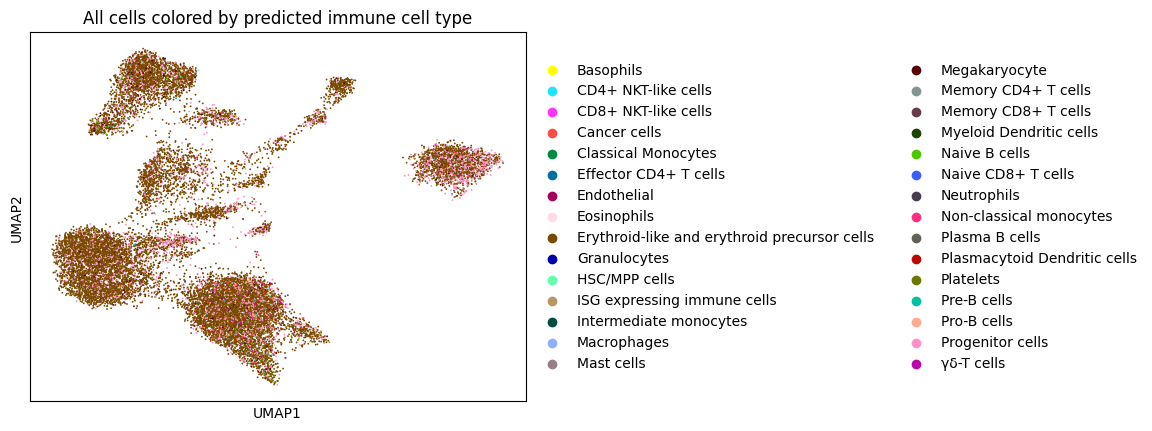

In [ ]:
import scanpy as sc

sc.pl.umap(
    adata,
    color="predicted_immune_cell_type",
    legend_loc="right margin",
    title="All cells colored by predicted immune cell type"
)


In [ ]:
import pandas as pd

# make a table of cluster × predicted type counts
ctab = pd.crosstab(
    adata.obs["leiden"],
    adata.obs["predicted_immune_cell_type"]
)

# convert to fractions per cluster
frac = ctab.div(ctab.sum(axis=1), axis=0)

# show it
display(frac)


predicted_immune_cell_type,Basophils,CD4+ NKT-like cells,CD8+ NKT-like cells,Cancer cells,Classical Monocytes,Effector CD4+ T cells,Endothelial,Eosinophils,Erythroid-like and erythroid precursor cells,Granulocytes,...,Naive CD8+ T cells,Neutrophils,Non-classical monocytes,Plasma B cells,Plasmacytoid Dendritic cells,Platelets,Pre-B cells,Pro-B cells,Progenitor cells,γδ-T cells
leiden,,,,,,,,,,,,,,,,,,,,,
0,0.000180,0.001257,0.008078,0.039670,0.002334,0.000898,0.008257,0.002513,0.695566,0.00018,...,0.000000,0.000539,0.00018,0.000359,0.000539,0.039849,0.003231,0.045234,0.101418,0.009334
1,0.000000,0.000000,0.000000,0.001497,0.000000,0.000000,0.000000,0.000000,0.857321,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000249,0.000499,0.122225,0.000499
2,0.000000,0.000000,0.000483,0.002897,0.000000,0.000000,0.000966,0.000483,0.792854,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000966,0.004346,0.020763,0.105263,0.000483
3,0.000000,0.000552,0.000000,0.022614,0.001655,0.000000,0.001103,0.001655,0.596801,0.00000,...,0.000000,0.001103,0.00000,0.000000,0.000000,0.007170,0.000000,0.004413,0.302261,0.000552
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.863343,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000923,0.126500,0.000000
5,0.000000,0.000000,0.000000,0.004367,0.000000,0.000000,0.000000,0.000000,0.637555,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.336245,0.000000
6,0.002387,0.000000,0.000000,0.002387,0.000000,0.000000,0.000000,0.000000,0.828162,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159905,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.819549,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.002506,0.155388,0.000000
8,0.000000,0.000000,0.002591,0.000000,0.000000,0.000000,0.000000,0.000000,0.738342,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.007772,0.012953,0.031088,0.088083,0.000000


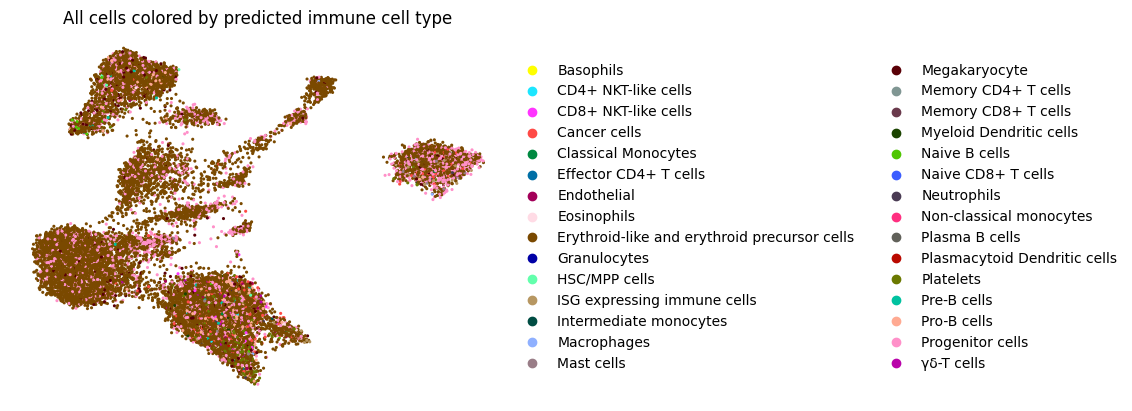

In [ ]:
import scanpy as sc

sc.pl.umap(
    adata,
    color="predicted_immune_cell_type",
    legend_loc="right margin",
    title="All cells colored by predicted immune cell type",
    frameon=False,
    size=20
)


{'0': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Pro-B cells & Platelets & Cancer cells', '1': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Megakaryocyte & Cancer cells & Pro-B cells', '2': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Megakaryocyte & Pro-B cells & Naive B cells', '3': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Megakaryocyte & Cancer cells & ISG expressing immune cells', '4': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Megakaryocyte & Pro-B cells & Basophils', '5': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Megakaryocyte & Cancer cells & Mast cells', '6': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Megakaryocyte & Basophils & Cancer cells', '7': 'Erythroid-like and erythroid precursor cells & Progenitor cells & Megakaryocyte & Macrophages & Pro-B cells', '8': 'Erythroid-like and erythroid precursor cells & Mega

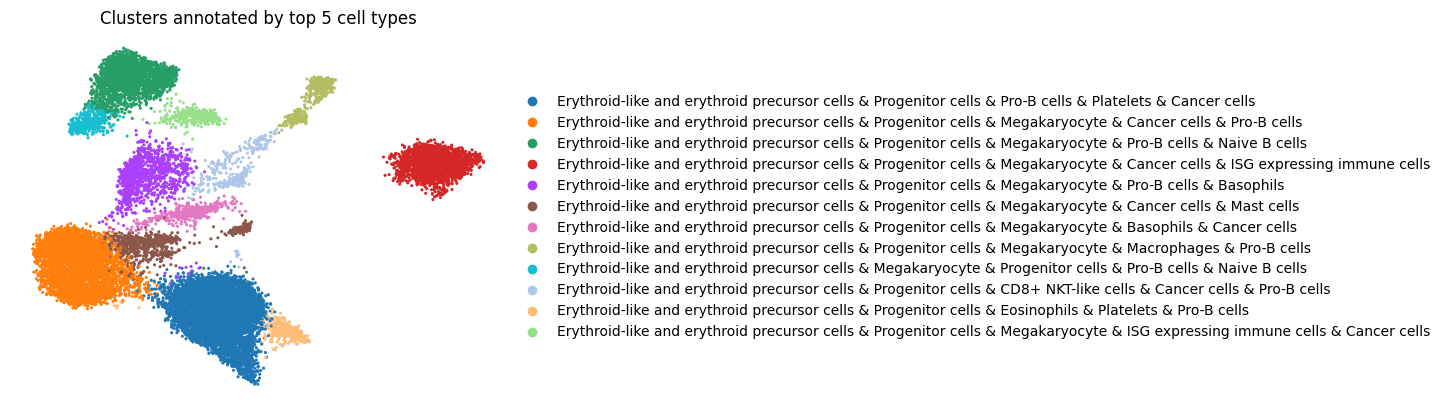

In [ ]:
# find the two top cell types per cluster
top2 = (
    ctab
    .apply(lambda row: row.nlargest(5).index.tolist(), axis=1)
    .to_dict()
)

# build a “Cluster 0 → ‘TypeA & TypeB’” mapping
cluster_to_label = {
    cluster: " & ".join(cell_types)
    for cluster, cell_types in top2.items()
}

# map it back into adata.obs
adata.obs["cluster_annotation_top5"] = adata.obs["leiden"].map(cluster_to_label)

# quick check
print(cluster_to_label)

# plot
sc.pl.umap(
    adata,
    color="cluster_annotation_top5",
    legend_loc="right margin",
    title="Clusters annotated by top 5 cell types",
    frameon=False,
    size=20
)


In [ ]:
# import re
# import pandas as pd
# import difflib

# # 1) Read your marker table
# #    adjust the path & separator if needed
# markers_df = pd.read_excel('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/ScTypeDB_full.xlsx')
# print(markers_df.head())

# # 2) Flatten all comma‑separated columns into one set of cleaned, uppercased gene symbols
# marker_cols = ["geneSymbolmore1", "geneSymbolmore2"]
# all_markers = set()

# for col in marker_cols:
#     for val in markers_df[col].dropna():
#         # split on commas or semicolons, strip whitespace
#         genes = re.split(r"[,;]+", val)
#         for g in genes:
#             g2 = g.strip().upper()
#             if g2:
#                 all_markers.add(g2)

# print(f"Loaded {len(all_markers)} unique marker symbols from your table.")

# # 3) Uppercase your AnnData var_names for case‑insensitive matching
# adata_1.var_names = adata_1.var_names.str.upper()

# # 4) Exact matches
# obs_genes = set(adata_1.var_names)
# matched = all_markers & obs_genes
# print(f"\n✅ Exact matches: {len(matched)} / {len(all_markers)}")
# print(sorted(matched))

# # 5) If you want to see a few “near‑misses” for the unmatched ones:
# unmatched = all_markers - matched
# fuzzy = {}
# for gene in unmatched:
#     # find up to 3 close var_names, cutoff=0.8
#     close = difflib.get_close_matches(gene, adata_1.var_names, n=3, cutoff=0.8)
#     if close:
#         fuzzy[gene] = close

# print(f"\n🔍 Fuzzy matches found for {len(fuzzy)} markers:")
# for gene, hits in list(fuzzy.items())[:10]:
#     print(f"  {gene} → {hits}")

# # 6) (Optional) If you suspect human⇄rat symbol mismatches,
# #    you can use BioMart or `mygene` to convert human symbols into rat orthologs,
# #    then re–run the same matching logic on that ortholog list.


In [ ]:
genesFile= pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/all_genes.csv",header=None)
genesFile.head()

,0,1,2
0,gene_id,gene_name,genome
1,ENSRNOG00000000001,Arsj,mRatBN7-2-113
2,ENSRNOG00000000007,Gad1,mRatBN7-2-113
3,ENSRNOG00000000008,Alx4,mRatBN7-2-113
4,ENSRNOG00000000009,Tmco5b,mRatBN7-2-113


In [ ]:
barcodeFile= pd.read_csv("/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/cell_metadata.csv",header=None)
barcodeFile.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,bc_wells,sample,species,gene_count,tscp_count,mread_count,bc1_wind,bc2_wind,bc3_wind,bc1_well,bc2_well,bc3_well
1,01_01_01__s1,cees1_951,mRatBN7-2-113,47,55,72,1,1,1,A1,A1,A1
2,01_01_02__s1,cees1_951,mRatBN7-2-113,18,20,27,1,1,2,A1,A1,A2
3,01_01_03__s1,cees1_951,mRatBN7-2-113,358,493,706,1,1,3,A1,A1,A3
4,01_01_04__s1,cees1_951,mRatBN7-2-113,36,42,55,1,1,4,A1,A1,A4


In [ ]:
from scipy.io import mmread

# Read the MTX file
matrix = mmread('/home/dipal/Downloads/ScType/DGE_filtered-20250510T214108Z-001/DGE_filtered/cees1_951/DGE_unfiltered/count_matrix.mtx')

# The result is a sparse matrix
print(matrix)

  (0, 982)	1
  (0, 1450)	1
  (0, 1521)	1
  (0, 1716)	1
  (0, 1772)	1
  (0, 1803)	1
  (0, 3744)	1
  (0, 4035)	1
  (0, 4551)	1
  (0, 4646)	1
  (0, 4894)	1
  (0, 4914)	1
  (0, 5642)	1
  (0, 5659)	1
  (0, 6631)	1
  (0, 6669)	1
  (0, 6692)	1
  (0, 7296)	1
  (0, 7539)	1
  (0, 7833)	1
  (0, 7849)	1
  (0, 7976)	1
  (0, 8422)	1
  (0, 8588)	1
  (0, 8728)	1
  :	:
  (54921, 8171)	1
  (54921, 8894)	1
  (54921, 9754)	1
  (54921, 10515)	1
  (54921, 11280)	1
  (54921, 12000)	1
  (54921, 12507)	1
  (54921, 12749)	1
  (54921, 12890)	1
  (54921, 13697)	4
  (54921, 15053)	1
  (54921, 15873)	1
  (54921, 16176)	1
  (54921, 16192)	2
  (54921, 16771)	1
  (54921, 18302)	1
  (54921, 19080)	1
  (54921, 19393)	1
  (54921, 19600)	1
  (54921, 20654)	1
  (54921, 23128)	1
  (54921, 25544)	1
  (54921, 28408)	1
  (54921, 29634)	1
  (54921, 30453)	0
